# Tarefa 02 Módulo 05

O nosso projeto desta sequência de módulos do curso será um aprofundamento da demonstração sobre classificação de risco de crédito que vimos lá no comecinho. Pois recebemos uma base já montada pra nós. Tenha certeza de que ela passou por um longo processamento até ficar daquele jeito. Neste exercício vamos exercitar o que aprendemos nas ultimas aulas e montar a variável resposta da base do nosso projeto.

#### Marcação de bom e mau
O objetivo da modelagem é classificar o risco de inadimplência, ou como se diz no meio, o risco de *default*. Podemos fazer longas discussões sobre o conceito de *default* com base em estudos e exigências regulatórias, para efeitos deste estudo, um cliente em *default* é aquele que está em 60 dias de atraso ou mais. Então classificaremos os clientes como 'bons' e 'maus' assim:
- **Maus** pagadores: são aqueles que entraram em 'default' (atraso 60 dias ou mais) nos 24 meses seguintes à aquisição do cartão de crédito. 
- **Bons** pagadores: são considerados todos os demais.
- **Excluídos**: Clientes que não adquiriram um cartão de crédito (seja por recusa, seja por desistência) não possuem informações de pagamento, portanto não se pode identificar se são bons ou maus. Há uma longa discussão e literatura sobre *inferência de rejeitados* que está fora do escopo deste exercício.

#### Bases disponíveis
Temos duas bases importantes aqui: uma de propostas, com diversas informações dos vários solicitantes de cartão de crédito, e uma base de pagamentos. A base de pagamentos será utilizada para identificar a ocorrência de *default*. A base de propostas tem diversas informações coletadas no momento da solicitação do crédito (isto é importante: qualquer informação posterior a essa data é impossível de ser coletada na aplicação do modelo e não pode ser utilizada).

As variáveis delas são:

Base de propostas - application_records.csv

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| CODE_GENDER| M = 'Masculino'; F = 'Feminino' |M/F|
| FLAG_OWN_CAR| Y = 'possui'; N = 'não possui' |Y/N|
| FLAG_OWN_REALTY| Y = 'possui'; N = 'não possui' |Y/N|
| CNT_CHILDREN| Quantidade de filhos |inteiro|
| AMT_INCOME_TOTAL| Annual income |inteiro|
| NAME_INCOME_TYPE|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| NAME_EDUCATION_TYPE| Nível de educação (ex: secundário, superior etc) |texto|
| NAME_FAMILY_STATUS | Estado civil (ex: solteiro, casado etc)| texto |
| NAME_HOUSING_TYPE | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| DAYS_BIRTH | Count backwards from current day (0), -1 means yesterday |inteiro|
| DAYS_EMPLOYED | Count backwards from current day (0), -1 means yesterday |inteiro|
| FLAG_MOBIL | Indica se possui celular (1 = sim, 0 = não) |binária|
| FLAG_WORK_PHONE | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| FLAG_PHONE | Indica se possui telefone (1 = sim, 0 = não) |binária|
| FLAG_EMAIL | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| OCCUPATION_TYPE | Occupation	 |Qualitativa|
| CNT_FAM_MEMBERS | quantidade de pessoas na residência |inteiro|

Base de pagamentos - pagamentos_largo.csv  

| Nome da Variável         | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| ID| identificador do cliente (chave) |inteiro|
| mes_00 a mes_24| faixa de atraso mês a mês do cliente <br>0: 1-29 days past due &nbsp;&nbsp;&nbsp;&nbsp; 1: 30-59 days past due <br />2: 60-89 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 3: 90-119 days overdue <br /> 4: 120-149 days overdue &nbsp;&nbsp;&nbsp;&nbsp; 5: more than 150 days <br />C: paid off that month &nbsp;&nbsp;&nbsp;&nbsp; X: No loan for the month |Qualitativa|

#### Construindo a variável resposta
A base de pagamentos está em um formato de 'base larga'. Essa base possui informações de pagamentos do cliente mês a mês a partir do mês de aquisição do crédito (mês 0) até o vigésimo quarto mês após a aquisição do crédito (mês 24). Utilizaremos essa base para determinar se um proponente é considerado 'bom pagador' ou caso apresente atraso representativo, será considerado 'mau pagador'.

#### Base larga vs base longa
A base ser larga significa que há uma linha para cada cliente, e que as informações estarão nas colunas, em contraste com a 'base longa', em que haveria uma linha para cada combinação cliente/mês, uma coluna indicando o cliente, outra indicando o mês, e apenas uma coluna com a informação do atraso.

#### Tarefa 1) Marcar *default* no mês
Faça uma indicadora de se o cliente está em *default* em cada uma das marcações (mes_00 a mes_24). Dica: você pode utilizar o método ```.isin()``` do Pandas. Consulte a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) caso necessário.

#### Tarefa 2) 'bons' e 'maus' ao longo de todos os 24 meses de desempenho
Marque para cada cliente se ele teve pelo menos um episódio de *default* entre o mês 0 e o mês 24. Dica: o método ```sum()``` pode ajudar. Caso precise, consulte a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) e procure pelo argumento ```axis```, você viu outros métodos que possuem esse argumento também. Tendo o número de meses em default de cada cliente, basta marcar ```True``` para todos aqueles que possuem pelo menos 1 mês em *default* e ```False``` para os demais.

#### Tarefa 3) Marcando proponentes expostos ao risco de crédito
Marcando proponentes que se tornaram tomadores: lembre-se de que clientes que não adquiriram o cartão devem ser desconsiderados. A base de pagamentos possui apenas clientes que adquiriram cartão de crédito, então você pode selecionar somente os clientes da base de propostas que se encontram na base de pagamentos.

#### Tarefa 4) Consolidando as informações
Faça uma junção das informações da base de propostas com a variável de *default* que você acabou de construir. Talvez você consiga realizar a tarefa 3 e tarefa 4 em uma única linha de código ;)

#### Tarefa 5) Verificando
Faça uma contagem dos valores do *default* que você construiu. 

In [347]:
import pandas as pd

In [349]:
pr = pd.read_csv('application_record.csv')
pg = pd.read_csv('pagamentos_largo.csv')

In [368]:
pg.head(100)

df = pg.fillna("0")
df.isna().sum()
df.head()

default = pg.isin(['2','3','4','5'])
default.sum()



ID          0
mes_0       7
mes_1      18
mes_10    102
mes_11     90
mes_12     94
mes_13    100
mes_14     85
mes_15     71
mes_16     76
mes_17     73
mes_18     58
mes_19     54
mes_2      48
mes_20     57
mes_21     66
mes_22     60
mes_23     65
mes_24     61
mes_3      59
mes_4      58
mes_5      76
mes_6      80
mes_7     102
mes_8      91
mes_9     109
dtype: int64

In [380]:
# 1) Seu código aqui

selecao = pg.isin(['2','3','4','5']).sum(axis = 1)
pg['selecao'] = selecao
pg.loc[(pg['selecao'] != 0), 'Default'] = 'True'
pg['Default'].value_counts()


Default
True    431
Name: count, dtype: int64

In [414]:
# 2) Seu código aqui

df_junto = pr.merge(pg,  on='ID', how='inner')
df_junto.drop(axis=1, columns = ['mes_0','mes_2','mes_3','mes_4', 'mes_1', 'mes_10', 'mes_11', 'mes_12', 'mes_13',
       'mes_14', 'mes_15', 'mes_16', 'mes_17', 'mes_18', 'mes_19', 'mes_2',
       'mes_20', 'mes_21', 'mes_22', 'mes_23', 'mes_24', 'mes_3', 'mes_4',
       'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'selecao'])






df_junto.head(10)
df_junto['Default'] = df_junto['Default'].fillna("false")

df_junto.loc[(df_junto['AMT_INCOME_TOTAL'] > 0) & (df_junto['AMT_INCOME_TOTAL'] <= 150000.0 ),'classe'] = 'baixa'
df_junto.loc[(df_junto['AMT_INCOME_TOTAL'] > 150000.0 ) & (df_junto['AMT_INCOME_TOTAL'] <= 250000.0 ),'classe'] = 'media'
df_junto.loc[(df_junto['AMT_INCOME_TOTAL'] > 250000.0 ),'classe'] = 'alta'
df_junto.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,selecao,Default,classe
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,NaN,0,NaN,NaN,NaN,0,NaN,0,false,baixa
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,NaN,0,NaN,0,NaN,0,false,alta
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,0,NaN,0,NaN,0,NaN,0,false,alta
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,0,0,0,0,0,0,NaN,0,false,alta
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,...,0,0,1,0,0,0,0,0,false,baixa


In [450]:
# 3) Seu código aqui
df_junto['Default'].value_counts()

contagem = df_junto['Default'].value_counts()
contagem_dict = contagem.to_dict()
default_count = contagem_dict.get('True', 0)#ruins
desa_count = contagem_dict.get('false', 0)#bons
total = default_count + desa_count
#print(total)


390
2.3
97.7


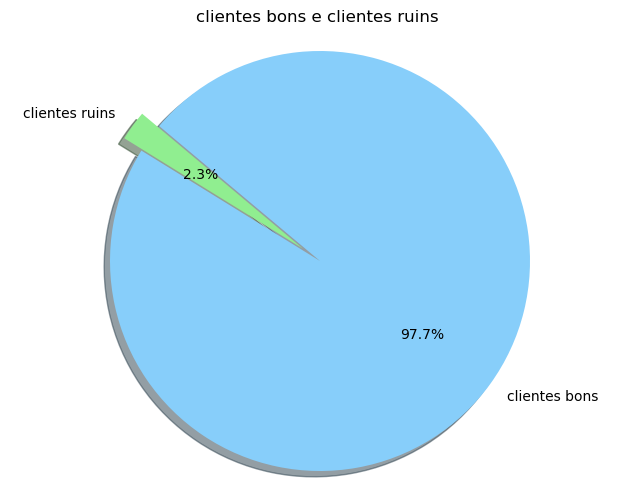

In [456]:
# 4) eu código aqui

import matplotlib.pyplot as plt

porcentagem_d= round((default_count / total) * 100,1)
print(default_count)
porcentagem_nd = round((desa_count/total)* 100,1)
print(porcentagem_d)
print(porcentagem_nd)
labels =['clientes ruins', 'clientes bons']
sizes= [porcentagem_d, porcentagem_nd]
colors= ['lightgreen' ,'lightskyblue']
explode=[0.1,0.0]
plt.figure(figsize=(8,6))

plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('clientes bons e clientes ruins ')
plt.axis('equal') 
plt.show()



# Pelo grafico podemos ver que menos de 1% dos nossos clientes sao clientes ruins, entao para podermos ter uma base boa de clientes bons vamos analisar qual o vetor para o cliente errar nos pagamentos.


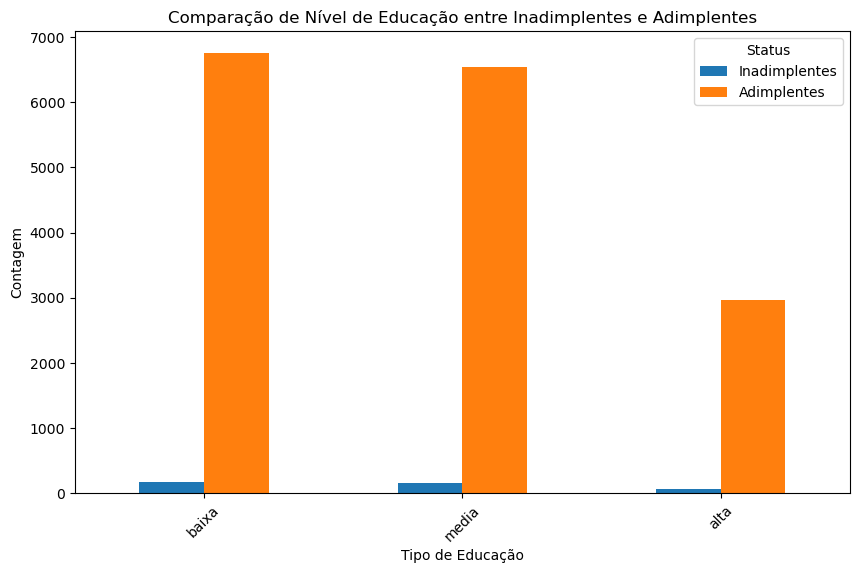

In [458]:
client_C= df_junto[df_junto['Default'] == 'false']
client_R= df_junto[df_junto['Default'] == 'True']


inadimplentes_educacao = client_R['classe'].value_counts()
adimplentes_educacao = client_C['classe'].value_counts()


comparacao_educacao = pd.DataFrame({
    'Inadimplentes': inadimplentes_educacao,
    'Adimplentes': adimplentes_educacao
}).fillna(0)

import matplotlib.pyplot as plt

comparacao_educacao.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Nível de Educação entre Inadimplentes e Adimplentes')
plt.ylabel('Contagem')
plt.xlabel('Tipo de Educação')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()



#NAME_EDUCATION_TYPE
#NAME_INCOME_TYPE
#CNT_CHILDREN


# Aparentemente, nao consegui achar algum vetor para tirar minha conclusao, os dados parecem ser bem distribuidos.